In [81]:
from scipy.io import wavfile

rate, audio = wavfile.read('morse.wav')

In [82]:
rate

8000

In [83]:
audio.shape

(77320,)

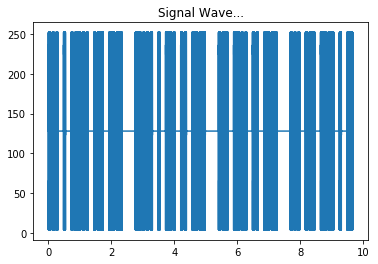

In [84]:
import matplotlib.pyplot as plt
import numpy as np

T = np.linspace(0, len(audio)/rate, num=len(audio))

plt.figure(1)
plt.title('Signal Wave...')
plt.plot(T,audio)
plt.show()

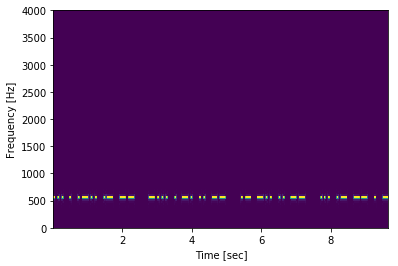

In [89]:
from scipy import signal

freqs, times, Sxx = signal.spectrogram(audio, rate, nfft=256)

plt.pcolormesh(times, freqs, Sxx)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

In [91]:
len(times)

345

In [105]:
freqs

array([   0.  ,   31.25,   62.5 ,   93.75,  125.  ,  156.25,  187.5 ,
        218.75,  250.  ,  281.25,  312.5 ,  343.75,  375.  ,  406.25,
        437.5 ,  468.75,  500.  ,  531.25,  562.5 ,  593.75,  625.  ,
        656.25,  687.5 ,  718.75,  750.  ,  781.25,  812.5 ,  843.75,
        875.  ,  906.25,  937.5 ,  968.75, 1000.  , 1031.25, 1062.5 ,
       1093.75, 1125.  , 1156.25, 1187.5 , 1218.75, 1250.  , 1281.25,
       1312.5 , 1343.75, 1375.  , 1406.25, 1437.5 , 1468.75, 1500.  ,
       1531.25, 1562.5 , 1593.75, 1625.  , 1656.25, 1687.5 , 1718.75,
       1750.  , 1781.25, 1812.5 , 1843.75, 1875.  , 1906.25, 1937.5 ,
       1968.75, 2000.  , 2031.25, 2062.5 , 2093.75, 2125.  , 2156.25,
       2187.5 , 2218.75, 2250.  , 2281.25, 2312.5 , 2343.75, 2375.  ,
       2406.25, 2437.5 , 2468.75, 2500.  , 2531.25, 2562.5 , 2593.75,
       2625.  , 2656.25, 2687.5 , 2718.75, 2750.  , 2781.25, 2812.5 ,
       2843.75, 2875.  , 2906.25, 2937.5 , 2968.75, 3000.  , 3031.25,
       3062.5 , 3093

In [93]:
Sxx.shape

(129, 345)

In [154]:
normalized_audio = (Sxx[21] > 0).astype(int)
normalized_audio = np.append(normalized_audio, 0)

In [155]:
normalized_audio

array([1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,

In [156]:
one_count = 0
zero_count = 0
output = ''
for value in normalized_audio:
    if value == 1:
        if zero_count > 2:
            output += '/'
           
        zero_count = 0
        one_count += 1
    if value == 0:
        if one_count <= 4 and one_count > 0:
            output += '.'
            one_count = 0
        elif one_count > 4:
            output += '-'
            one_count = 0
            
        zero_count += 1

print(output)
            

..././.-../.-/--/-..././-./../--/.-/-../../--/.../.-/--/./-


In [157]:
MORSE_CODE_DICT = { 'A':'.-', 'B':'-...', 
                    'C':'-.-.', 'D':'-..', 'E':'.', 
                    'F':'..-.', 'G':'--.', 'H':'....', 
                    'I':'..', 'J':'.---', 'K':'-.-', 
                    'L':'.-..', 'M':'--', 'N':'-.', 
                    'O':'---', 'P':'.--.', 'Q':'--.-', 
                    'R':'.-.', 'S':'...', 'T':'-', 
                    'U':'..-', 'V':'...-', 'W':'.--', 
                    'X':'-..-', 'Y':'-.--', 'Z':'--..', 
                    '1':'.----', '2':'..---', '3':'...--', 
                    '4':'....-', '5':'.....', '6':'-....', 
                    '7':'--...', '8':'---..', '9':'----.', 
                    '0':'-----', ', ':'--..--', '.':'.-.-.-', 
                    '?':'..--..', '/':'-..-.', '-':'-....-', 
                    '(':'-.--.', ')':'-.--.-'}

In [172]:
def decrypt(message):
    splitted_message = message.split('/')
    decrypted_message = ''
    
    for morse_code in splitted_message:
        letter = dict(zip(MORSE_CODE_DICT.values(),MORSE_CODE_DICT.keys())).get(morse_code)
        decrypted_message += letter
    
    return decrypted_message

In [173]:
decrypt(output)

'SELAMBENIMADIMSAMET'